In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Define dataset paths
test_dataset_path = './data/test_dataset.csv'
training_dataset_1_path = './data/training_dataset_1.csv'
training_dataset_2_path = './data/training_dataset_2.csv'

# Load datasets
test_dataset = pd.read_csv(test_dataset_path)
training_dataset_1 = pd.read_csv(training_dataset_1_path)
training_dataset_2 = pd.read_csv(training_dataset_2_path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


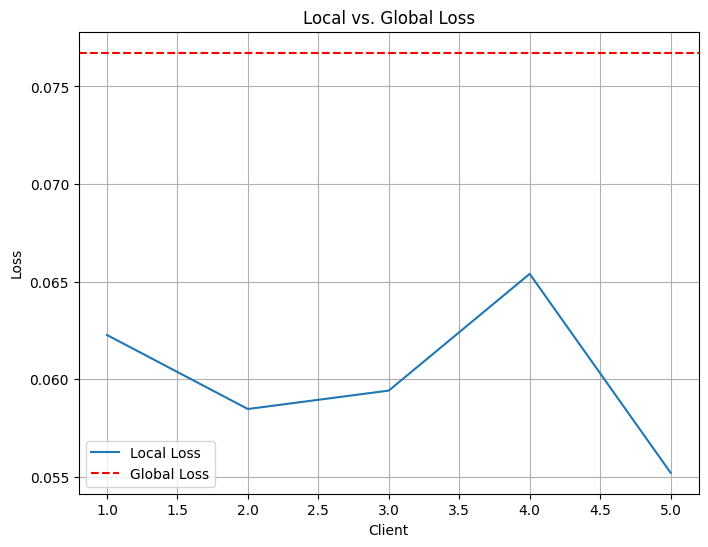

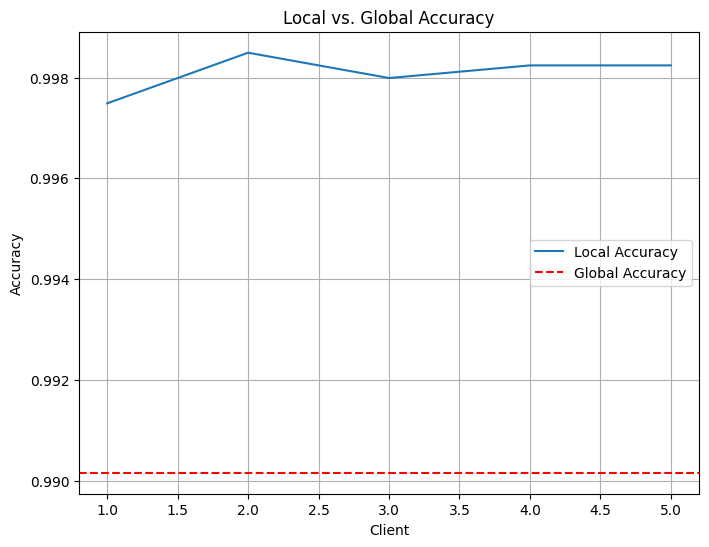

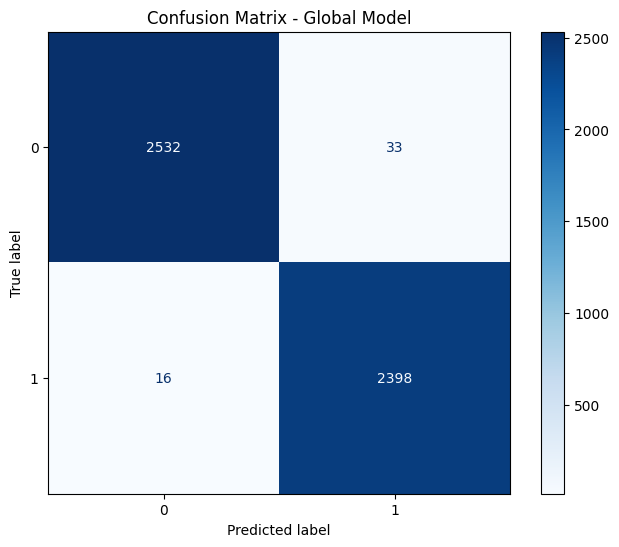

Global Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.99      0.99      0.99      2414

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979

Global Model Accuracy: 0.9901586663988753
Global Model Loss: 0.0767297508748182
Average Local Accuracy: 0.9980917139934122
Average Local Loss: 0.06014749725670574


In [7]:
# Combine the training datasets
training_data = pd.concat([training_dataset_1, training_dataset_2], ignore_index=True)

# Preprocessing: Separate features and target
X = training_data.drop(columns=['DATETIME', 'ATT_FLAG'])
y = training_data['ATT_FLAG']

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Split training data into 5 clients for Hierarchical FL
clients_data = np.array_split(X_train, 5)
clients_labels = np.array_split(y_train, 5)

# Initialize lists to track local metrics
local_accuracies = []
local_losses = []

# Train local models
local_models = []
for client_X, client_y in zip(clients_data, clients_labels):
    local_model = RandomForestClassifier(n_estimators=10, random_state=42)
    local_model.fit(client_X, client_y)
    local_models.append(local_model)

    # Evaluate local model
    y_pred_local = local_model.predict(client_X)
    loss_local = log_loss(client_y, local_model.predict_proba(client_X))
    acc_local = accuracy_score(client_y, y_pred_local)

    local_accuracies.append(acc_local)
    local_losses.append(loss_local)

# Aggregate local models into a global model
global_model = RandomForestClassifier(n_estimators=50, random_state=42)
global_model.fit(X_train, y_train)

# Evaluate the global model
y_pred_global = global_model.predict(X_test)
global_loss = log_loss(y_test, global_model.predict_proba(X_test))
global_accuracy = accuracy_score(y_test, y_pred_global)

# Generate confusion matrix for global model
cm_global = confusion_matrix(y_test, y_pred_global)
disp_global = ConfusionMatrixDisplay(confusion_matrix=cm_global, display_labels=np.unique(y_test))

# Results Visualization

# 1. Local vs Global Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_losses) + 1), local_losses, label='Local Loss')
plt.axhline(y=global_loss, color='r', linestyle='--', label='Global Loss')
plt.title('Local vs. Global Loss')
plt.xlabel('Client')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Local vs Global Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_accuracies) + 1), local_accuracies, label='Local Accuracy')
plt.axhline(y=global_accuracy, color='r', linestyle='--', label='Global Accuracy')
plt.title('Local vs. Global Accuracy')
plt.xlabel('Client')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Confusion Matrix for Global Model
plt.figure(figsize=(8, 6))
disp_global.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix - Global Model')
plt.show()

# 4. Detailed Classification Report for Global Model
print("Global Model Classification Report:")
print(classification_report(y_test, y_pred_global))

# Display final results
print(f"Global Model Accuracy: {global_accuracy}")
print(f"Global Model Loss: {global_loss}")
print(f"Average Local Accuracy: {np.mean(local_accuracies)}")
print(f"Average Local Loss: {np.mean(local_losses)}")

No more data available for client 2.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


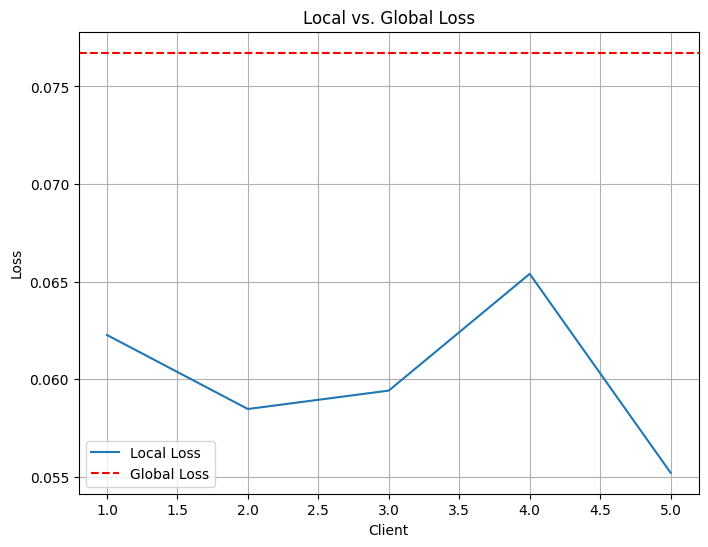

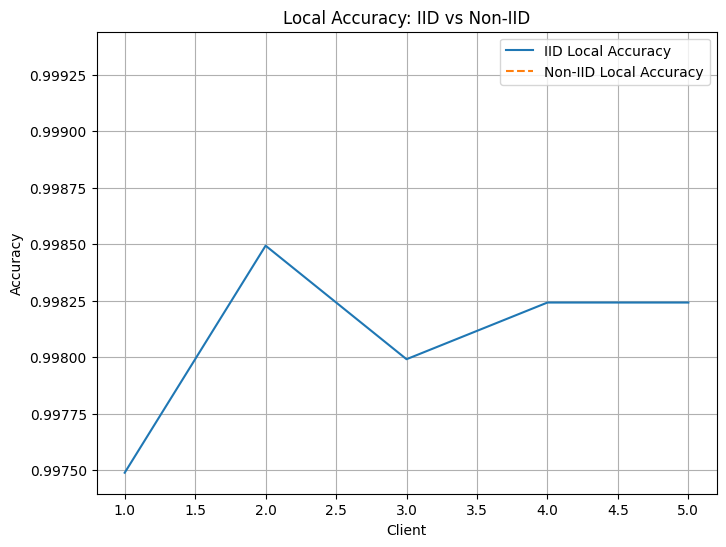

<Figure size 800x600 with 0 Axes>

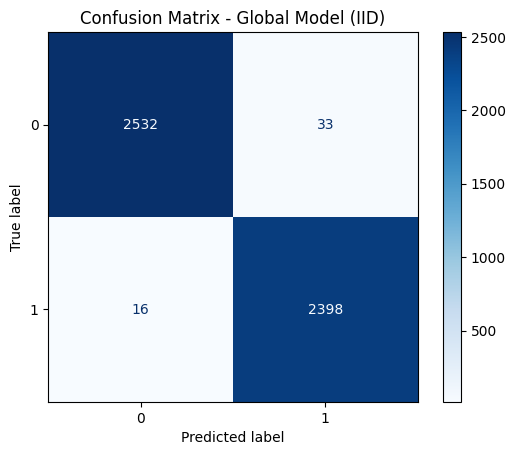

<Figure size 800x600 with 0 Axes>

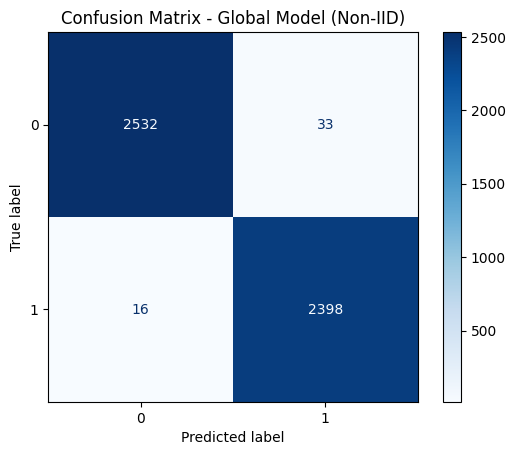

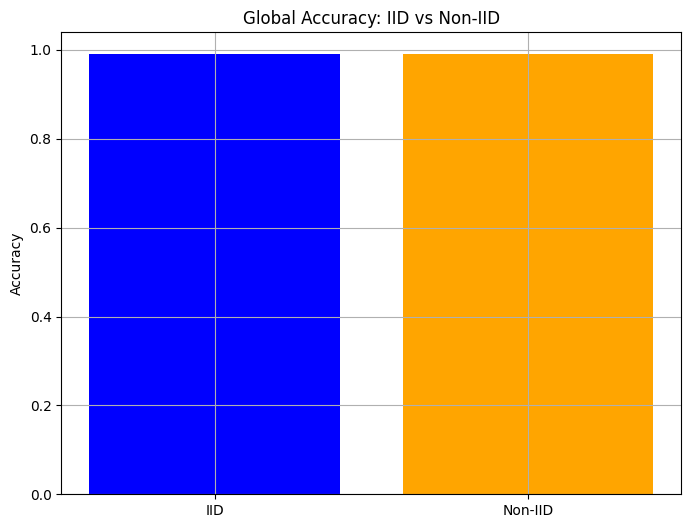

Global Model Classification Report (IID):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.99      0.99      0.99      2414

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979

Global Model Classification Report (Non-IID):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2565
           1       0.99      0.99      0.99      2414

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979

IID Global Accuracy: 0.9901586663988753, Loss: 0.0767297508748182
Non-IID Global Accuracy: 0.9901586663988753, Loss: 0.0767297508748182


In [8]:
# Function to create Non-IID client data
def create_non_iid_clients(X, y, num_clients=5):
    client_data = []
    classes = y.unique()
    available_X, available_y = X.copy(), y.copy()

    for i in range(num_clients):
        if available_X.empty:
            print(f"No more data available for client {i+1}.")
            break

        class_subset = np.random.choice(classes, size=min(len(classes), 2), replace=False)
        mask = available_y.isin(class_subset)

        client_X, client_y = available_X[mask], available_y[mask]
        available_X, available_y = available_X[~mask], available_y[~mask]

        client_data.append((client_X, client_y))

    return client_data

# Create IID client data
clients_data_iid = np.array_split(X_train, 5)
clients_labels_iid = np.array_split(y_train, 5)

# Create Non-IID client data
non_iid_clients = create_non_iid_clients(X_train, y_train)

# Helper function to train local models
def train_local_models(clients_data, clients_labels):
    local_models = []
    local_accuracies = []
    local_losses = []
    for client_X, client_y in zip(clients_data, clients_labels):
        local_model = RandomForestClassifier(n_estimators=10, random_state=42)
        local_model.fit(client_X, client_y)
        local_models.append(local_model)

        # Evaluate local model
        y_pred_local = local_model.predict(client_X)
        loss_local = log_loss(client_y, local_model.predict_proba(client_X))
        acc_local = accuracy_score(client_y, y_pred_local)

        local_accuracies.append(acc_local)
        local_losses.append(loss_local)
    return local_models, local_accuracies, local_losses

# Train local models for IID data
local_models_iid, local_accuracies_iid, local_losses_iid = train_local_models(clients_data_iid, clients_labels_iid)

# Train local models for Non-IID data
non_iid_clients_data = [data[0] for data in non_iid_clients]
non_iid_clients_labels = [data[1] for data in non_iid_clients]
local_models_non_iid, local_accuracies_non_iid, local_losses_non_iid = train_local_models(non_iid_clients_data, non_iid_clients_labels)

# Train global model
global_model_iid = RandomForestClassifier(n_estimators=50, random_state=42)
global_model_iid.fit(X_train, y_train)

# Evaluate the global model for IID data
y_pred_global_iid = global_model_iid.predict(X_test)
global_loss_iid = log_loss(y_test, global_model_iid.predict_proba(X_test))
global_accuracy_iid = accuracy_score(y_test, y_pred_global_iid)

# Train and evaluate global model for Non-IID
global_model_non_iid = RandomForestClassifier(n_estimators=50, random_state=42)
global_model_non_iid.fit(X_train, y_train)
y_pred_global_non_iid = global_model_non_iid.predict(X_test)
global_loss_non_iid = log_loss(y_test, global_model_non_iid.predict_proba(X_test))
global_accuracy_non_iid = accuracy_score(y_test, y_pred_global_non_iid)

# Generate confusion matrices
cm_global_iid = confusion_matrix(y_test, y_pred_global_iid)
cm_global_non_iid = confusion_matrix(y_test, y_pred_global_non_iid)

# Results Visualization

# 1. Compare Local Loss for IID and Non-IID
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_losses) + 1), local_losses, label='Local Loss')
plt.axhline(y=global_loss, color='r', linestyle='--', label='Global Loss')
plt.title('Local vs. Global Loss')
plt.xlabel('Client')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 2. Compare Local Accuracy for IID and Non-IID
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(local_accuracies_iid) + 1), local_accuracies_iid, label='IID Local Accuracy')
plt.plot(range(1, len(local_accuracies_non_iid) + 1), local_accuracies_non_iid, label='Non-IID Local Accuracy', linestyle='--')
plt.title('Local Accuracy: IID vs Non-IID')
plt.xlabel('Client')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Confusion Matrices for IID and Non-IID
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_global_iid).plot(cmap='Blues')
plt.title('Confusion Matrix - Global Model (IID)')
plt.show()

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_global_non_iid).plot(cmap='Blues')
plt.title('Confusion Matrix - Global Model (Non-IID)')
plt.show()

# 4. Global Accuracy Comparison
plt.figure(figsize=(8, 6))
plt.bar(['IID', 'Non-IID'], [global_accuracy_iid, global_accuracy_non_iid], color=['blue', 'orange'])
plt.title('Global Accuracy: IID vs Non-IID')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Display final results
print("Global Model Classification Report (IID):")
print(classification_report(y_test, y_pred_global_iid))

print("Global Model Classification Report (Non-IID):")
print(classification_report(y_test, y_pred_global_non_iid))

print(f"IID Global Accuracy: {global_accuracy_iid}, Loss: {global_loss_iid}")
print(f"Non-IID Global Accuracy: {global_accuracy_non_iid}, Loss: {global_loss_non_iid}")